# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/weekly project/RTA_Dataset.csv')

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.shape

(12316, 32)

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [5]:
fig = px.histogram(df, x="Number_of_vehicles_involved")
fig.show()


fig = px.histogram(df, x="Number_of_casualties")
fig.show()

## Data cleaning before preprocessing

### dropping columns

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,829
Type_of_vehicle,950
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385


In [6]:
# those columns conttains null values there exsit not necessary
column_to_drop = [
                  'Educational_level',
                 'Vehicle_driver_relation',
                 'Owner_of_vehicle',
                  'Work_of_casuality',
                  'Fitness_of_casuality',
                  ]

df = df.drop(column_to_drop, axis=1)

In [7]:
# dropping unnecessray columns
column_to_drop = [
                  'Casualty_class',
                  'Sex_of_casualty',
                  'Age_band_of_casualty',
                  'Casualty_severity',
                  'Pedestrian_movement',
                  ]

df = df.drop(column_to_drop, axis=1)

### Remove inconsistent values

In [8]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(r'Lorry.*', 'Lorry', regex=True)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(r'lorry.*', 'Lorry', regex=True)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(r'Public.*', 'Public', regex=True)
df['Driving_experience'] = df['Driving_experience'].replace('unknown', 'Unknown')


In [ ]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', nan, 'Long Lorry', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

### Change data type

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-9-1bfd8981fe14>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



build a model that classfiy the age of driver

## Data Preprocessing


### handling missing values

In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,829
Type_of_vehicle,950
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385


In [10]:
df['Driving_experience'].fillna('Unknown' , inplace=True)

df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0] , inplace=True)

df.drop('Service_year_of_vehicle' , axis=1 , inplace=True) # a lot of 'unknown' and missing values , so i will drop the column

df.drop('Defect_of_vehicle' , axis=1 , inplace=True) # a lot of null values , most of it (no defect) , drop the column

df = df.dropna(subset=['Area_accident_occured'])

df['Lanes_or_Medians'].fillna('Unknown' , inplace=True)

df = df.dropna(subset=['Road_allignment'])

df['Types_of_Junction'].fillna('Unknown' , inplace=True)

df = df.dropna(subset=['Type_of_collision'])

df['Vehicle_movement'].fillna('Unknown' , inplace=True)

df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0]  , inplace=True)

<ipython-input-10-dedd4b894437>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0


### Data impalance problem

In [11]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,9992
Serious Injury,1660
Fatal injury,151


In [12]:
acc_sev = df['Accident_severity'].value_counts()

fig = px.bar(acc_sev, x=acc_sev.index, y='count', title='Total count of each accident severity', color_discrete_sequence=['#DD5050'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=acc_sev.index,
        ticktext=acc_sev.index
    )
)
fig.show()

In [13]:
# take sample from Slight Injury class
df_slight = df[df['Accident_severity'] == 'Slight Injury']
df_slight = df_slight.sample(2000)

df_Serious = df[df['Accident_severity'] == 'Serious Injury']

# Duplicate the dataframe 8 times
df_Fatal = df[df['Accident_severity'] == 'Fatal injury']
df_Fatal = pd.concat([df_Fatal] * 8, ignore_index=True)

print(len(df_Fatal))
df = pd.concat([df_slight, df_Serious, df_Fatal])

1208


In [14]:
acc_sev = df['Accident_severity'].value_counts()

fig = px.bar(acc_sev, x=acc_sev.index, y='count', title='Total count of each accident severity', color_discrete_sequence=['#DD5050'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=acc_sev.index,
        ticktext=acc_sev.index
    )
)
fig.show()

In [ ]:
df.shape

(4868, 20)

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("Accident_severity", axis=1) # drop labels for training set
y = df["Accident_severity"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident
8148,2024-08-01 18:20:00,Wednesday,Under 18,Male,1-2yr,Lorry,Unknown,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,1,Moving Backward,Driving carelessly
801,2024-08-01 22:48:00,Monday,31-50,Male,Above 10yr,Public,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - lights lit,Raining,Vehicle with vehicle collision,2,1,Moving Backward,Driving carelessly
1112,2024-08-01 11:16:00,Sunday,18-30,Male,Below 1yr,Other,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,5,Moving Backward,Changing lane to the left
5072,2024-08-01 03:26:00,Thursday,Unknown,Female,1-2yr,Lorry,Other,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Moving Backward
8991,2024-08-01 08:50:00,Monday,Unknown,Female,1-2yr,Stationwagen,Church areas,One way,Tangent road with flat terrain,No junction,Asphalt roads,Wet or damp,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,No distancing


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

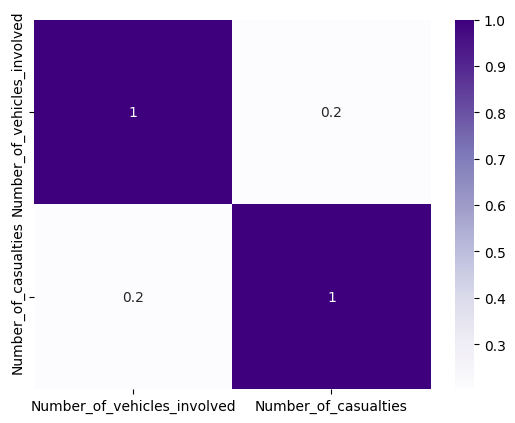

In [22]:
# only tow numerical columns
corr_matrix= df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='Purples', annot=True )

plt.show()


In [19]:
# Age_band_of_driver
grouped_df = df.groupby(['Accident_severity', 'Age_band_of_driver']).size().reset_index(name='count')
grouped_df

color_palette = {'Slight': 'lightblue', 'Serious': 'orange', 'Fatal': 'red'}

fig = px.bar(grouped_df, x='Age_band_of_driver', y='count', color='Accident_severity', color_discrete_map=color_palette, barmode='group', title='Accident Severity by Age')

fig.update_layout(
    xaxis_title='Collision Type',
    yaxis_title='Accident Count'
)

fig.show()

In [23]:
grouped_df2 = df.groupby(['Accident_severity', 'Road_surface_type']).size().reset_index(name='count')


color_palette = {'Slight': 'lightblue', 'Serious': 'orange', 'Fatal': 'red'}

fig = px.bar(grouped_df2, x='Road_surface_type', y='count', color='Accident_severity', barmode='group', color_discrete_map=color_palette, title='Accident Severity by Road surface type')

fig.update_layout(
    xaxis_title='Collision Type',
    yaxis_title='Accident Count'
)

fig.show()

In [26]:
grouped_df4 = df.groupby(['Accident_severity', 'Number_of_casualties']).size().reset_index(name='count')

color_palette = {'Slight': 'lightblue', 'Serious': 'orange', 'Fatal': 'red'}
fig = px.bar(grouped_df4, x='Number_of_casualties', y='count', color='Accident_severity',color_discrete_map=color_palette,  barmode='group', title='Accident Severity by Road surface type')

fig.update_layout(
    xaxis_title='Collision Type',
    yaxis_title='Accident Count'
)

fig.show()

## Feature Selection


In [ ]:
X_train.head()

,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Cause_of_accident
8148,Under 18,Male,1-2yr,Lorry,Dry,Daylight,Normal,Collision with roadside objects,2,Driving carelessly
801,31-50,Male,Above 10yr,Public,Wet or damp,Darkness - lights lit,Raining,Vehicle with vehicle collision,2,Driving carelessly
1112,18-30,Male,Below 1yr,Other,Dry,Daylight,Normal,Collision with roadside objects,2,Changing lane to the left
5072,Unknown,Female,1-2yr,Lorry,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Moving Backward
8991,Unknown,Female,1-2yr,Stationwagen,Wet or damp,Daylight,Normal,Vehicle with vehicle collision,2,No distancing


In [ ]:
column_to_drop = [
                  'Time',
                  'Day_of_week',
                  'Lanes_or_Medians',
                  'Road_allignment',
                  'Types_of_Junction',
                  'Number_of_casualties',
                  'Road_surface_type',
                  'Vehicle_movement',
                  'Area_accident_occured',
                  ]

X_train = X_train.drop(column_to_drop, axis=1)
X_test = X_test.drop(column_to_drop, axis=1)


## Scalling and encoding

In [ ]:
X_train.head()

,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Cause_of_accident
8822,18-30,Male,Above 10yr,Automobile,Wet or damp,Daylight,Normal,Vehicle with vehicle collision,3,Changing lane to the right
801,31-50,Male,Above 10yr,Public,Wet or damp,Darkness - lights lit,Raining,Vehicle with vehicle collision,2,Driving carelessly
1112,18-30,Male,Below 1yr,Other,Dry,Daylight,Normal,Collision with roadside objects,2,Changing lane to the left
5072,Unknown,Female,1-2yr,Lorry,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,Moving Backward
6504,18-30,Male,Above 10yr,Automobile,Dry,Daylight,Normal,Vehicle with vehicle collision,2,Changing lane to the right


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_pip = make_pipeline(MinMaxScaler())
cat_pip_one_hot = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cat_pip_ordinal = make_pipeline(OrdinalEncoder(categories=[['Unknown', 'No Licence', 'Below 1yr' , '1-2yr' , '2-5yr' , '5-10yr' , 'Above 10yr'],
                                                           ['Unknown' , 'Under 18' , '18-30' , '31-50' , 'Over 51']]))

pre_pip = ColumnTransformer([
    ('cat_one_hot', cat_pip_one_hot, ['Type_of_vehicle',  'Sex_of_driver' , 'Road_surface_conditions', 'Light_conditions',
                                      'Weather_conditions', 'Type_of_collision', 'Cause_of_accident']),
    ('cat_ordinal', cat_pip_ordinal, ['Driving_experience',  'Age_band_of_driver']),
    ])



In [ ]:
X_train_prepared = pre_pip.fit_transform(X_train)
X_test_prepared = pre_pip.transform(X_test)

In [ ]:
X_train_prepared

<3894x65 sparse matrix of type '<class 'numpy.float64'>'
	with 34387 stored elements in Compressed Sparse Row format>

## Modeling


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_prepared, y_train)

DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_prepared, y_train)

SVC()

#### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_prepared, y_train)

KNeighborsClassifier()

## Model Evaluation



### Logistic Regression eval


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# LogisticRegression
y_pred_log_reg = log_reg.predict(X_test_prepared)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc = accuracy_score(y_test, y_pred_log_reg)
acc

0.45585215605749485

In [ ]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_log_reg

array([[ 77,  57, 126],
       [ 31,  69, 207],
       [ 38,  71, 298]])

### Decision Tree Classifier eval

In [ ]:
y_pred_dt = dt.predict(X_test_prepared)
acc = accuracy_score(y_test, y_pred_dt)
acc

0.6170431211498973

### svm eval

In [ ]:
y_pred_svm = svm.predict(X_test_prepared)
acc = accuracy_score(y_test, y_pred_svm)
acc

0.4681724845995893

### KNN eval

In [ ]:
y_pred_knn = knn.predict(X_test_prepared)
acc = accuracy_score(y_test, y_pred_knn)
acc

0.5739219712525667

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
The decision tree classifier has an accuracy of 61% which is the highest accuracy compared to other models.

- **Evaluate Trade-offs**:

The data has many features and most of it is encoded using one-hot encoder, this adds more complexity to the data, but the data size after removing the imbalance is reduced, so high computational power is not needed.


- **Justify Your Choice**:
Decision tree classifier is considered the best model because it shows the highest accuracy.

- **Feature Importance**: To build the model, you need to identify the features associated with the target variable, using correlation you can see the associated feature.
- **Model Limitations**: There is a large amount of categorical data, and converting it to one-hot encoding may reduce performance.

- **Future Improvements**:
In the problem of data imbalance, if i use another technique to repeat the Fatal rows, I think it will be better, also I think the age and year of the experiments if they are numbers instead of ranges, it will be better for the performance of the model.